<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week4_Day4_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Loading and Exploration:

In [1]:
import pandas as pd
df= pd.read_csv("/content/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Target Variable (What we want to predict)
price_range: This is the price category of the phone.

0 means low cost

1 means medium cost

2 means high cost

3 means very high cost

There are 20 features, and all of them are numerical (either whole numbers or decimal numbers). Here's what each one means:

battery_power: The battery capacity of the phone, measured in mAh.

blue: Whether the phone has Bluetooth or not. (1 means it has Bluetooth, 0 means it doesn’t)

clock_speed: How fast the processor is, measured in GHz.

dual_sim: Whether the phone supports two SIM cards. (1 = yes, 0 = no)

fc: The number of megapixels of the front camera.

four_g: Whether the phone supports 4G. (1 = yes, 0 = no)

int_memory: The amount of internal memory in gigabytes (GB).

m_dep: The thickness (depth) of the phone in centimeters.

mobile_wt: The weight of the phone in grams.

n_cores: The number of processor cores.

pc: The number of megapixels of the main (primary) camera.

px_height: The height resolution of the screen (in pixels).

px_width: The width resolution of the screen (in pixels).

ram: The amount of RAM memory, in megabytes (MB).

sc_h: The height of the screen, in centimeters.

sc_w: The width of the screen, in centimeters.

talk_time: How many hours the battery lasts while talking.

three_g: Whether the phone supports 3G. (1 = yes, 0 = no)

touch_screen: Whether the phone has a touch screen. (1 = yes, 0 = no)

wifi: Whether the phone supports WiFi. (1 = yes, 0 = no)



In [2]:
# Basic info
print("\nDataset Info:")
print(df.info())

# Summary statistics (mean, median, min, max, std, etc.)
print("\nDescriptive Statistics:")
print(df.describe())

# Count of each category in the target variable
print("\nPrice Range Distribution:")
print(df['price_range'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64 

2. Data Cleaning and Preprocessing:

In [3]:
# Vérifier s’il y a des valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes (si peu nombreuses)
df = df.dropna()

# OU : Remplacer les valeurs manquantes par la moyenne/médiane
# Exemple pour une colonne :
df['battery_power'].fillna(df['battery_power'].mean(), inplace=True)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<ipython-input-3-f670cef12de4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['battery_power'].fillna(df['battery_power'].mean(), inplace=True)


In [5]:
print(df.columns)



Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


3. Statistical Analysis with NumPy and SciPy:

In [6]:
import pandas as pd
from scipy import stats

# Calculate and print central tendency and variability for each numeric column
for col in df.columns:
    print(f"Statistics for {col}:")

    # Central tendency
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0]  # take first mode if multiple

    # Variability
    data_range = df[col].max() - df[col].min()
    variance = df[col].var()
    std_dev = df[col].std()

    # Distribution shape
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    print(f" Mean: {mean}")
    print(f" Median: {median}")
    print(f" Mode: {mode}")
    print(f" Range: {data_range}")
    print(f" Variance: {variance}")
    print(f" Standard Deviation: {std_dev}")
    print(f" Skewness: {skewness}")
    print(f" Kurtosis: {kurtosis}")
    print("-" * 40)

# Hypothesis testing example: compare 'battery_power' between two price ranges
# For example, comparing price_range 0 and 1
group1 = df[df['price_range'] == 0]['battery_power']
group2 = df[df['price_range'] == 1]['battery_power']

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test

print(f"T-test between price_range 0 and 1 for battery_power:")
print(f" t-statistic: {t_stat}")
print(f" p-value: {p_val}")

# Correlation between each feature and target (price_range)
print("\nCorrelation with price_range:")
for col in df.columns.drop('price_range'):
    corr, p = stats.pearsonr(df[col], df['price_range'])
    print(f"{col}: Pearson correlation = {corr:.3f}, p-value = {p:.3g}")


Statistics for battery_power:
 Mean: 1238.5185
 Median: 1226.0
 Mode: 618
 Range: 1497
 Variance: 193088.35983766866
 Standard Deviation: 439.4182060835312
 Skewness: 0.03189847179278164
 Kurtosis: -1.2241438831965528
----------------------------------------
Statistics for blue:
 Mean: 0.495
 Median: 0.0
 Mode: 0
 Range: 1
 Variance: 0.25010005002500796
 Standard Deviation: 0.5001000400170029
 Skewness: 0.020016015215014945
 Kurtosis: -2.0016019625995645
----------------------------------------
Statistics for clock_speed:
 Mean: 1.52225
 Median: 1.5
 Mode: 0.5
 Range: 2.5
 Variance: 0.6658628689344699
 Standard Deviation: 0.8160042088950705
 Skewness: 0.1780841202790887
 Kurtosis: -1.3234172221019123
----------------------------------------
Statistics for dual_sim:
 Mean: 0.5095
 Median: 1.0
 Mode: 1
 Range: 1
 Variance: 0.25003476738369157
 Standard Deviation: 0.5000347661750046
 Skewness: -0.03803539334775485
 Kurtosis: -2.0005548652196294
----------------------------------------
Sta

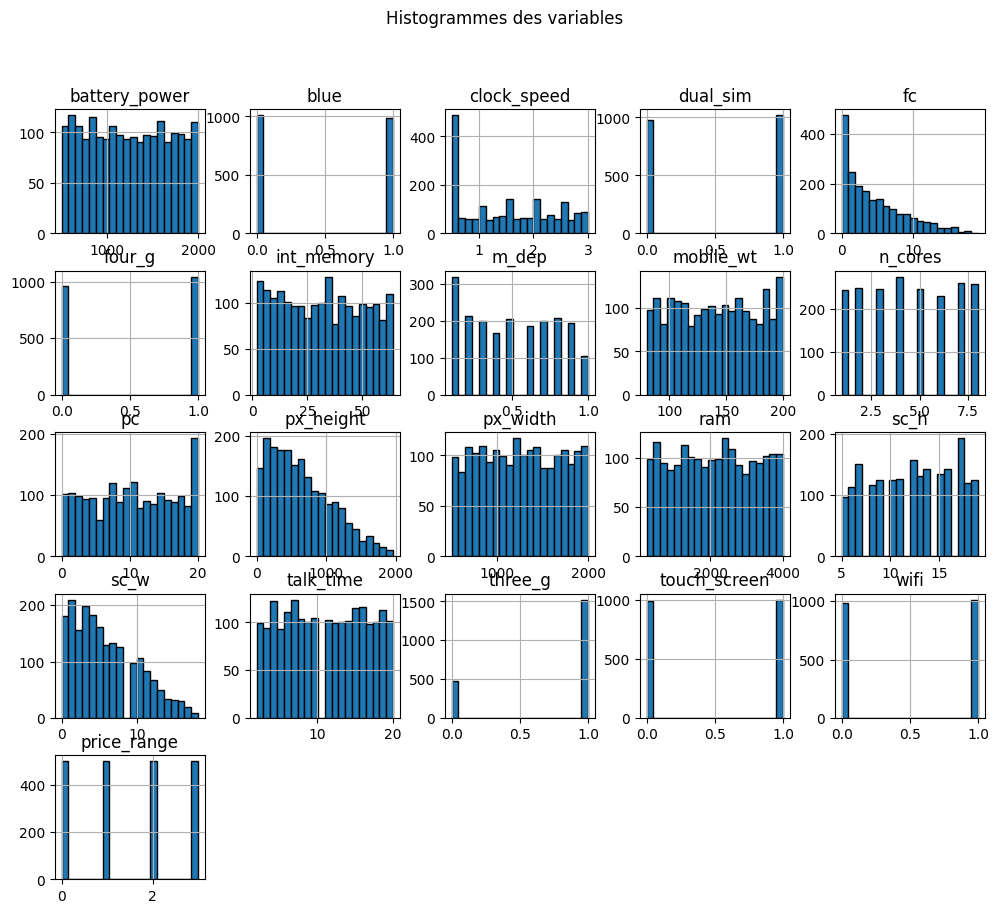

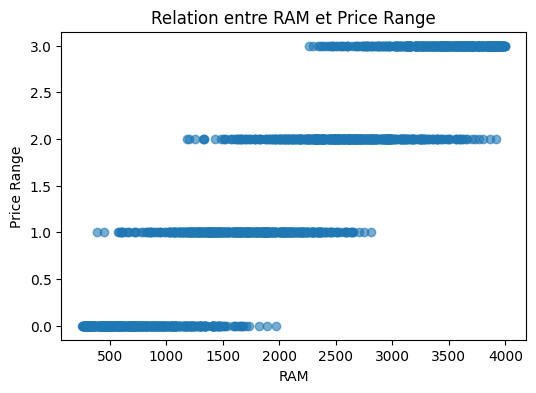

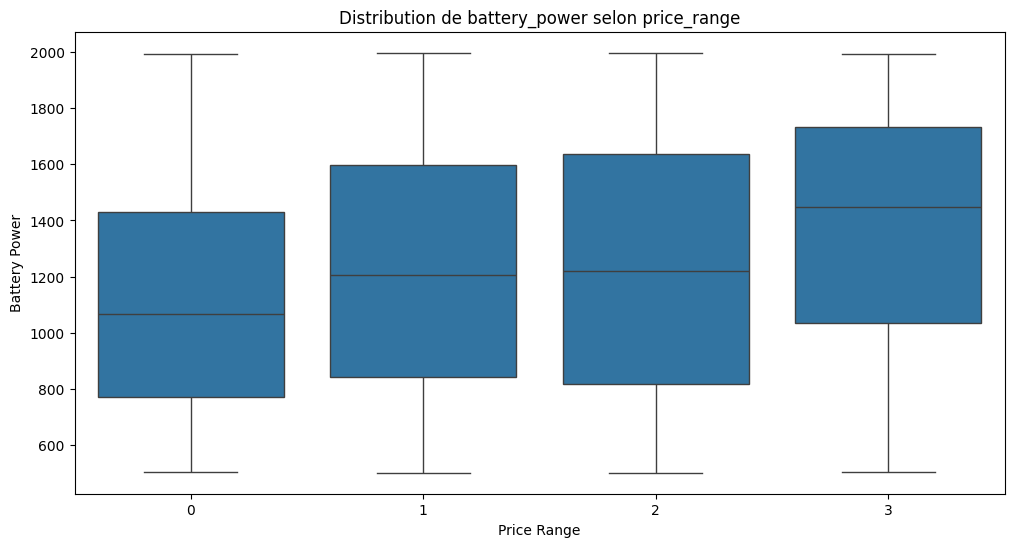

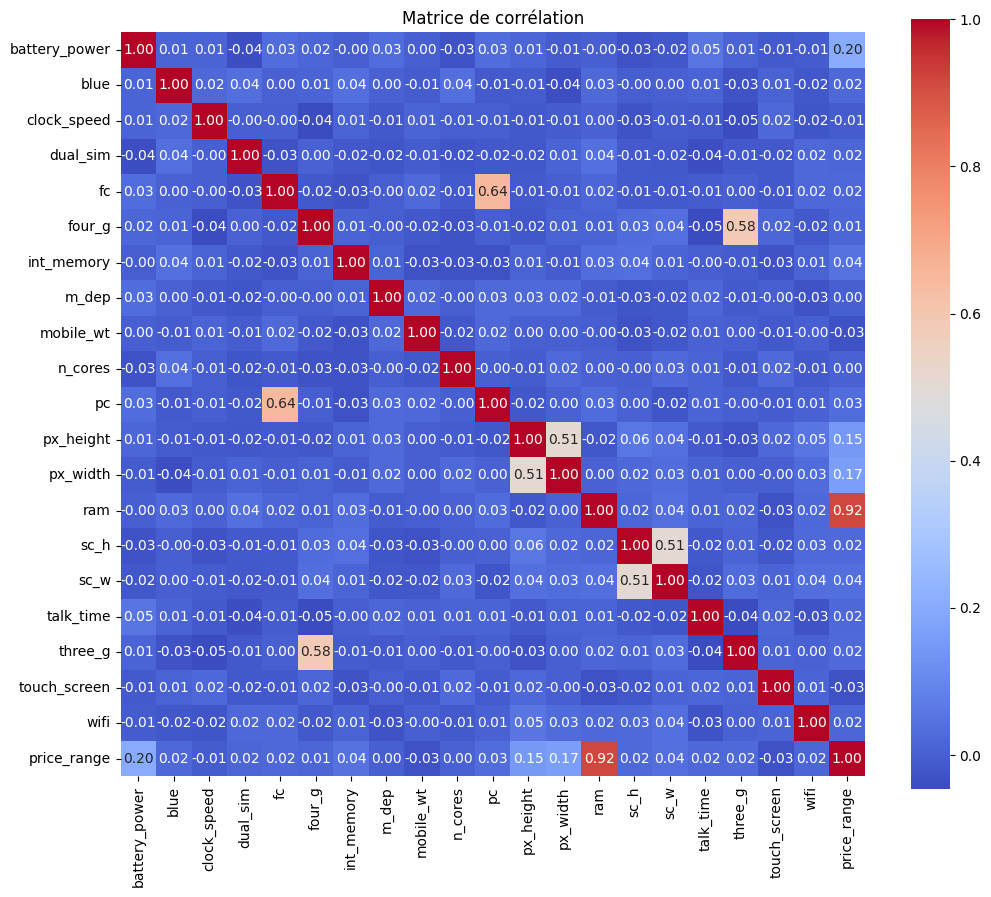

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms : distribution de chaque variable numérique
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histogrammes des variables')
plt.show()

# Scatter plots : exemple entre deux variables
plt.figure(figsize=(6, 4))
plt.scatter(df['ram'], df['price_range'], alpha=0.6)
plt.title('Relation entre RAM et Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

# Box plots : distribution des variables par groupes (exemple : price_range)
plt.figure(figsize=(12, 6))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Distribution de battery_power selon price_range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

# Heatmap : matrice de corrélation avec annotations
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de corrélation')
plt.show()


5. Insight Synthesis and Conclusion:
- Features like RAM, battery power, internal memory, and CPU cores strongly influence mobile price categories.

- Connectivity options (3G, 4G, WiFi) have a moderate impact on pricing.

- Some features such as mobile weight and depth have little effect on price.

- Statistical tests and visualizations consistently highlight the key variables affecting price.

- These findings can help improve mobile pricing strategies and prediction models.